# All Paths from Source Lead to Destination

Given the `edges` of a directed graph where `edges[i] = [ai, bi]` indicates there is an edge between nodes `ai` and `bi`, and two nodes `source` and `destination` of this graph, determine whether or not all paths starting from `source` eventually, end at `destination`, that is:

- At least one path exists from the `source` node to the `destination` node
- If a path exists from the `source` node to a node with no outgoing edges, then that node is equal to `destination`.
- The number of possible paths from `source` to `destination` is a finite number.

Return `true` if and only if all roads from `source` lead to `destination`.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

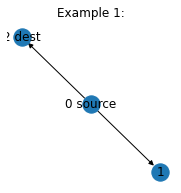

In [2]:
G = nx.DiGraph()
G.add_edges_from([['0 source',1],['0 source','2 dest']])

plt.figure(figsize=(3,3))
plt.title('Example 1:')
nx.draw(G, with_labels = True)

Example 1:
      
```
Input: n = 3, edges = [[0,1],[0,2]], source = 0, destination = 2
Output: false
Explanation: It is possible to reach and get stuck on both node 1 and node 2.
```

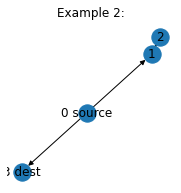

In [3]:
G = nx.DiGraph()
G.add_edges_from([['0 source',1],['0 source','3 dest'],[1,2],[2,1]])

plt.figure(figsize=(3,3))
plt.title('Example 2:')
nx.draw(G, with_labels = True)

Example 2:

```
Input: n = 4, edges = [[0,1],[0,3],[1,2],[2,1]], source = 0, destination = 3
Output: false
Explanation: We have two possibilities: to end at node 3, or to loop over node 1 and node 2 indefinitely.
```

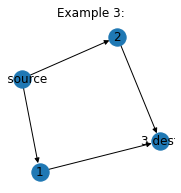

In [4]:
G = nx.DiGraph()
G.add_edges_from([['0 source',1],['0 source',2],[1,'3 dest'],[2,'3 dest']])

plt.figure(figsize=(3,3))
plt.title('Example 3:')
nx.draw(G, with_labels = True)

Example 3:

```
Input: n = 4, edges = [[0,1],[0,2],[1,3],[2,3]], source = 0, destination = 3
Output: true
```

In [5]:
from typing import *
from collections import defaultdict

class Solution:
    def leadsToDestination(self, n: int, edges: List[List[int]], source: int, destination: int) -> bool:
        self.visited = []
        
        adj_list = defaultdict(list)
        for src, des in edges:
            adj_list[src].append(des)
        
        def dfs(curr):          
            if len(adj_list[curr]) == 0:
                return curr == destination
            self.visited.append(curr)
            for neighbor in adj_list[curr]:
                # there is a loop
                if neighbor in self.visited:
                    return False
                if not dfs(neighbor):
                    return False
            self.visited.remove(curr)
            return True

        res = dfs(source)
        return res

In [6]:
n = 3
edges = [[0,1],[0,2]]
source = 0
destination = 2

expected = False

output = Solution().leadsToDestination(n, edges, source, destination)
print(output)
assert output == expected

False


In [7]:
n = 4
edges = [[0,1],[0,3],[1,2],[2,1]]
source = 0
destination = 3

expected = False

output = Solution().leadsToDestination(n, edges, source, destination)
print(output)
assert output == expected

False


In [8]:
n = 4
edges = [[0,1],[0,2],[1,3],[2,3]]
source = 0
destination = 3

expected = True

output = Solution().leadsToDestination(n, edges, source, destination)
print(output)
assert output == expected

True
